<a href="https://colab.research.google.com/github/rutuja-patil24/CMPE-258-Deep_Learning/blob/main/Assignment_04/j)_Tensorflow_not_using_high_level_api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1: Imports

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Step 2: Generate 3-Variable Non-Linear Data

In [2]:
def generate_data(n_samples=1000):
    x1 = np.random.uniform(-5, 5, n_samples)
    x2 = np.random.uniform(-5, 5, n_samples)
    x3 = np.random.uniform(-5, 5, n_samples)

    y = 2 * np.sin(x1) + 0.5 * x2**2 + 0.3 * x3**3 + np.cos(x1 * x2) + np.random.normal(0, 0.2, n_samples)

    X = np.stack([x1, x2, x3], axis=1).astype(np.float32)
    y = y.reshape(-1, 1).astype(np.float32)
    return tf.constant(X), tf.constant(y)

X, y = generate_data()


## Step 3: Initialize Weights (He Initialization)

In [3]:
def he_init(shape):
    return tf.Variable(tf.random.normal(shape) * tf.sqrt(2.0 / shape[0]))

input_dim = 3
hidden1 = 64
hidden2 = 32
output_dim = 1

W1 = he_init((input_dim, hidden1))
b1 = tf.Variable(tf.zeros((hidden1,)))
W2 = he_init((hidden1, hidden2))
b2 = tf.Variable(tf.zeros((hidden2,)))
W3 = he_init((hidden2, output_dim))
b3 = tf.Variable(tf.zeros((output_dim,)))


## Step 4: ReLU and Forward Pass using tf.einsum

In [4]:
def relu(x):
    return tf.maximum(0.0, x)

def forward_pass(X):
    z1 = tf.einsum('ij,jk->ik', X, W1) + b1
    a1 = relu(z1)
    z2 = tf.einsum('ij,jk->ik', a1, W2) + b2
    a2 = relu(z2)
    z3 = tf.einsum('ij,jk->ik', a2, W3) + b3
    return z3


## Step 5: Training Loop

In [5]:
learning_rate = 0.001
epochs = 1000
loss_history = []

for epoch in range(epochs):
    with tf.GradientTape() as tape:
        y_pred = forward_pass(X)
        loss = tf.reduce_mean(tf.square(y_pred - y))

    gradients = tape.gradient(loss, [W1, b1, W2, b2, W3, b3])
    for param, grad in zip([W1, b1, W2, b2, W3, b3], gradients):
        param.assign_sub(learning_rate * grad)

    loss_history.append(loss.numpy())
    if epoch % 100 == 0 or epoch < 5:
        print(f"Epoch {epoch}, Loss: {loss.numpy():.4f}")


Epoch 0, Loss: 285.4562
Epoch 1, Loss: 204.2916
Epoch 2, Loss: 150.3522
Epoch 3, Loss: 110.4734
Epoch 4, Loss: 82.0692
Epoch 100, Loss: 24.9566
Epoch 200, Loss: 22.3931
Epoch 300, Loss: 20.7607
Epoch 400, Loss: 19.3389
Epoch 500, Loss: 17.9413
Epoch 600, Loss: 16.6113
Epoch 700, Loss: 15.2641
Epoch 800, Loss: 13.8751
Epoch 900, Loss: 12.4762


## Step 6: Plot Training Loss

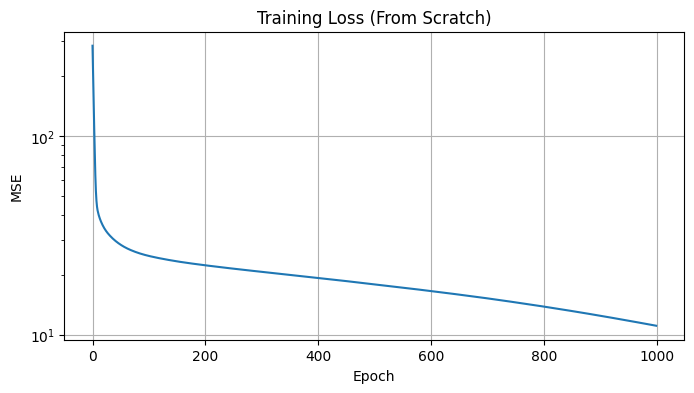

In [6]:
plt.figure(figsize=(8, 4))
plt.plot(loss_history)
plt.title("Training Loss (From Scratch)")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.yscale("log")
plt.grid(True)
plt.show()

##  Step 7: Evaluate Predictions

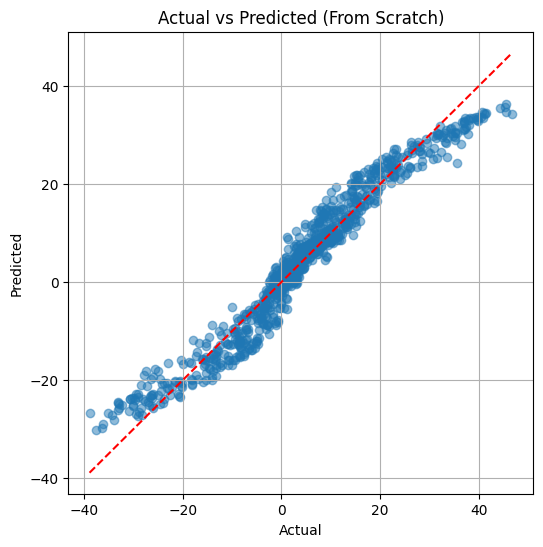

In [7]:
y_pred = forward_pass(X)

plt.figure(figsize=(6, 6))
plt.scatter(y.numpy(), y_pred.numpy(), alpha=0.5)
plt.plot([y.numpy().min(), y.numpy().max()], [y.numpy().min(), y.numpy().max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted (From Scratch)")
plt.grid(True)
plt.show()


## Step 8: 4D Prediction Visualization

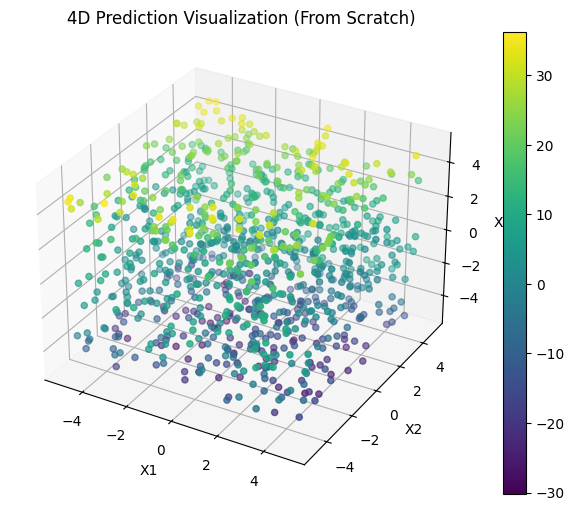

In [8]:
def plot_4d(X_np, y_pred_np):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    sc = ax.scatter(X_np[:, 0], X_np[:, 1], X_np[:, 2], c=y_pred_np[:, 0], cmap='viridis')
    plt.colorbar(sc)
    ax.set_xlabel("X1")
    ax.set_ylabel("X2")
    ax.set_zlabel("X3")
    ax.set_title("4D Prediction Visualization (From Scratch)")
    plt.show()

plot_4d(X.numpy(), y_pred.numpy())


## Step 9: Custom Test Predictions

In [9]:
def predict_custom(x1, x2, x3):
    sample = tf.constant([[x1, x2, x3]], dtype=tf.float32)
    return forward_pass(sample).numpy()[0][0]

test_points = [(-4, -4, -4), (0, 0, 0), (4, 4, 4)]
for x1, x2, x3 in test_points:
    pred = predict_custom(x1, x2, x3)
    actual = 2 * np.sin(x1) + 0.5 * x2**2 + 0.3 * x3**3 + np.cos(x1 * x2)
    print(f"Input: ({x1}, {x2}, {x3}) → Prediction: {pred:.3f}, Actual: {actual:.3f}")


Input: (-4, -4, -4) → Prediction: -9.830, Actual: -10.644
Input: (0, 0, 0) → Prediction: -0.041, Actual: 1.000
Input: (4, 4, 4) → Prediction: 26.881, Actual: 24.729
